## Support Vector Machine Algorithm

#### Using sklearn iris dataset

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [118]:
iris = load_iris()

In [119]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [120]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [121]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [122]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [123]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [124]:
# add a flower name col
df['flower'] = df.target.apply(lambda x: iris.target_names[x])
df.head()  # df final

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [125]:
# Setosa
df0 = df[df.target == 0]
len(df0)

50

In [126]:
# Versicolor
df1 = df[df.target == 1]
len(df1)

50

In [158]:
# virginica
df2 = df[df.target == 2]

In [127]:
df[48:53]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


***sepal length (cm) & sepal width (cm)  - setosa vs versicolor***

Text(0, 0.5, 'sepal width (cm)')

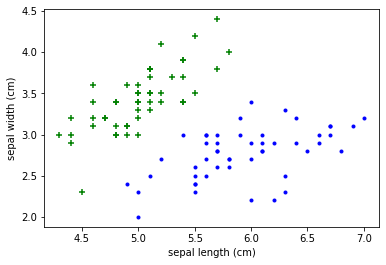

In [160]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],  color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],  color="blue", marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

***petal length (cm) & petal width (cm)  - setosa vs versicolor vs virginica***

Text(0, 0.5, 'petal width (cm)')

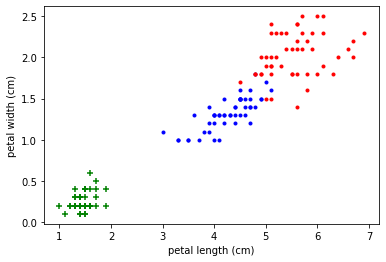

In [130]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],  color="green", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],  color="blue", marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],  color="red", marker='.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [131]:
x = df.drop(['target', 'flower'], axis='columns')
y = df.flower
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [134]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: flower, dtype: object

In [135]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [136]:
len(x_train)

120

In [137]:
len(x_test)

30

In [138]:
# train model using SVM
model = SVC()
model.fit(x_train, y_train)

SVC()

In [139]:
model.score(x_test, y_test)

0.9666666666666667

***confusion martix***

In [148]:
from sklearn.metrics import confusion_matrix

In [152]:
conf_m = confusion_matrix(y_test, model.predict(x_test))

In [153]:
conf_m

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]], dtype=int64)

Text(33.0, 0.5, 'Truth')

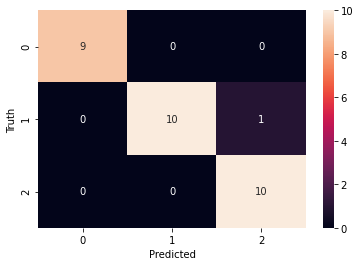

In [157]:
import seaborn as sn
sn.heatmap(conf_m, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [173]:
# regularization
model2 = SVC(C=15)

In [174]:
model2.fit(x_train, y_train)

SVC(C=15)

In [175]:
model2.score(x_test, y_test)

0.9333333333333333